In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import os
import ta  # Install using: pip install ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("✔ All libraries imported successfully.")


✔ All libraries imported successfully.


In [2]:
# Define stock data folder
DATA_DIRECTORY = r"C:\STOCK PRICE PREDICTION MODEL COMPANY"

# Ensure the directory exists
if not os.path.exists(DATA_DIRECTORY):
    raise FileNotFoundError(f"❌ Stock data folder not found: {DATA_DIRECTORY}")

# Get available tickers (list all CSV files)
available_tickers = [file.replace('.csv', '') for file in os.listdir(DATA_DIRECTORY) if file.endswith('.csv')]

print("\n✅ Available Company Tickers:")
print(available_tickers[:900], "...")  # Print first 10 tickers for preview



✅ Available Company Tickers:
['ALANKIT.NS', 'ALBERTDAVD.NS', 'ALCHEM.NS', 'ALEMBICLTD.NS', 'ALICON.NS', 'ALKALI.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALLCARGO.NS', 'ALLSEC.NS', 'ALMONDZ.NS', 'ALOKINDS.NS', 'ALPA.NS', 'ALPHAGEO.NS', 'ALPSINDUS.NS', 'AMBER.NS', 'AMBIKCO.NS', 'AMBUJACEM.NS', 'AMDIND.NS', 'AMJLAND.NS', 'AMRUTANJAN.NS', 'ANANTRAJ.NS', 'ANDHRAPAP.NS', 'ANDHRSUGAR.NS', 'ANIKINDS.NS', 'ANKITMETAL.NS', 'ANSALAPI.NS', 'ANSALHSG.NS', 'ANUP.NS', 'APARINDS.NS', 'APCL.NS', 'APCOTEXIND.NS', 'APEX.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLO.NS', 'APOLLOHOSP.NS', 'APOLLOPIPE.NS', 'APOLLOTYRE.NS', 'APOLSINHOT.NS', 'APTECHT.NS', 'ARCHIDPLY.NS', 'ARCHIES.NS', 'ARCOTECH.NS', 'ARENTERP.NS', 'ARIES.NS', 'ARIHANTSUP.NS', 'ARMANFIN.NS', 'AROGRANITE.NS', 'ARROWGREEN.NS', 'ARSHIYA.NS', 'ARSSINFRA.NS', 'ARTEMISMED.NS', 'ARVIND.NS', 'ARVINDFASN.NS', 'ARVSMART.NS', 'ASAHIINDIA.NS', 'ASAHISONG.NS', 'ASAL.NS', 'ASALCBR.NS', 'ASHAPURMIN.NS', 'ASHIANA.NS', 'ASHIMASYN.NS', 'ASHOKA.NS', 'ASHOKLEY.NS', 'ASIAN

In [4]:
# Ask user for company input
company = input("\n🔍 Enter company name: ").upper() + ".NS"

# Validate if company exists in available tickers
if company not in available_tickers:
    print(f"❌ Company data not found for {company}. Check spelling or data availability.")
    exit()

# Load the company's CSV file
file_path = os.path.join(DATA_DIRECTORY, f"{company}.csv")
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])  # Convert date column

# Ask for date range
start_date = input("\n📅 Enter start date (YYYY-MM-DD) or press Enter for full range: ")
end_date = input("📅 Enter end date (YYYY-MM-DD) or press Enter for full range: ")

# Apply date range filtering
if start_date:
    df = df[df['Date'] >= start_date]
if end_date:
    df = df[df['Date'] <= end_date]

print(f"✔ Data loaded for {company}. Shape: {df.shape}")


✔ Data loaded for AMDIND.NS. Shape: (946, 8)


In [5]:
# Feature Engineering: Adding Technical Indicators
df['SMA_50'] = ta.trend.sma_indicator(df['Close'], window=50)  # 50-day SMA
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)  # 20-day EMA
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)  # RSI Indicator
df['BB_High'], df['BB_Mid'], df['BB_Low'] = ta.volatility.bollinger_hband(df['Close'], window=20), ta.volatility.bollinger_mavg(df['Close'], window=20), ta.volatility.bollinger_lband(df['Close'], window=20)  # Bollinger Bands
df['MACD'] = ta.trend.macd(df['Close'])  # MACD Indicator

# Drop NaN values caused by rolling calculations
df.dropna(inplace=True)

print("✔ Technical Indicators Added.")

✔ Technical Indicators Added.


In [6]:
# Define features used for training
features = ["Open", "High", "Low", "Close", "Volume"]

# Scale features using StandardScaler
scaler_X = StandardScaler()
scaler_Y = MinMaxScaler()

X = scaler_X.fit_transform(df[features])
y = scaler_Y.fit_transform(df[["Close"]])

# Reshape X for LSTM input (samples, time-steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"✔ Data Preprocessed. Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


✔ Data Preprocessed. Train Shape: (717, 1, 5), Test Shape: (180, 1, 5)


In [9]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model  # ✅ FIXED: Import load_model

# Define features used for training
features = ["Open", "High", "Low", "Close", "Volume"]

# Scale features using StandardScaler
scaler_X = StandardScaler()
scaler_Y = MinMaxScaler()

X = scaler_X.fit_transform(df[features])
y = scaler_Y.fit_transform(df[["Close"]])

# Reshape X for LSTM input (samples, time-steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"✔ Data Preprocessed. Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

# Print shapes for debugging
print(f"X_train shape during training: {X_train.shape}")
print(f"X_test shape before prediction: {X_test.shape}")

# Ensure `X_test` matches the model input shape (samples, time-steps, features)
expected_timesteps = X_train.shape[1]  # Get time-step from training shape
expected_features = X_train.shape[2]   # Get feature count from training shape

if X_test.shape[1] != expected_timesteps or X_test.shape[2] != expected_features:
    print(f"⚠ Reshaping X_test from {X_test.shape} to ({X_test.shape[0]}, {expected_timesteps}, {expected_features})")
    X_test = X_test.reshape(X_test.shape[0], expected_timesteps, expected_features)

print(f"X_test shape after correction: {X_test.shape}")  # Should match training shape

# Load trained model and ensure it's compiled
DATA_DIRECTORY = "C:/STOCK PRICE PREDICTION MODEL COMPANY"
model = load_model(os.path.join(DATA_DIRECTORY, "lstm_model.h5"), compile=False)  # ✅ FIXED: load_model now defined
model.compile(optimizer="adam", loss="mean_squared_error")

print("✔ Model successfully loaded and compiled.")
print("Expected input shape by model:", model.input_shape)
print("Actual X_test shape before prediction:", X_test.shape)

# Verify model input shape before making predictions
if model.input_shape[2] != X_test.shape[2]:
    raise ValueError(f"Mismatch in feature count: Model expects {model.input_shape[2]} features, but X_test has {X_test.shape[2]}")

# Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_actual = scaler_Y.inverse_transform(y_test)

print("✔ Predictions successfully generated.")


✔ Data Preprocessed. Train Shape: (717, 1, 5), Test Shape: (180, 1, 5)
X_train shape during training: (717, 1, 5)
X_test shape before prediction: (180, 1, 5)
X_test shape after correction: (180, 1, 5)
✔ Model successfully loaded and compiled.
Expected input shape by model: (None, 1, 5)
Actual X_test shape before prediction: (180, 1, 5)
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
✔ Predictions successfully generated.


In [10]:
# Load trained model
model = load_model(os.path.join(DATA_DIRECTORY, "lstm_model.h5"))

# Ensure X_test has the correct shape before making predictions
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[2])  # Ensure consistency

# Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_actual = scaler_Y.inverse_transform(y_test)

print("✔ Predictions successfully generated.")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
✔ Predictions successfully generated.


In [11]:
# Build the LSTM Model
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=50, return_sequences=False),
    Dropout(0.3),
    Dense(units=1)  # Output Layer
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Save the trained model
model.save(os.path.join(DATA_DIRECTORY, "lstm_model.h5"))

print("✔ Model trained and saved successfully.")


Epoch 1/50


c:\Users\SANGSHAPTAK DEV\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1749
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1139
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0676
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019  
Epoch 16/50
23/23 ━━━━━━━━━━

✔ Model trained and saved successfully.


In [12]:
import os  # Ensure os module is imported
from tensorflow.keras.models import load_model

# Define stock data directory (Ensure it's defined earlier in your script)
DATA_DIRECTORY = r"C:\STOCK PRICE PREDICTION MODEL COMPANY"

# Load trained model
model = load_model(os.path.join(DATA_DIRECTORY, "lstm_model.h5"))

# Ensure X_test has the correct shape before making predictions
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[2])  # Ensure consistency

# Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_actual = scaler_Y.inverse_transform(y_test)


# Evaluate Model
mae_total = mean_absolute_error(y_actual, y_pred)
mse_total = mean_squared_error(y_actual, y_pred)
rmse_total = np.sqrt(mse_total)
r2_total = r2_score(y_actual, y_pred)

print("\n✅ Model Evaluation Metrics:")
print(f"🔹 MAE: {mae_total}")
print(f"🔹 MSE: {mse_total}")
print(f"🔹 RMSE: {rmse_total}")
print(f"🔹 R² Score: {r2_total}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step

✅ Model Evaluation Metrics:
🔹 MAE: 0.8893495983547679
🔹 MSE: 1.2046719982803826
🔹 RMSE: 1.0975755091474948
🔹 R² Score: 0.9791114497136817


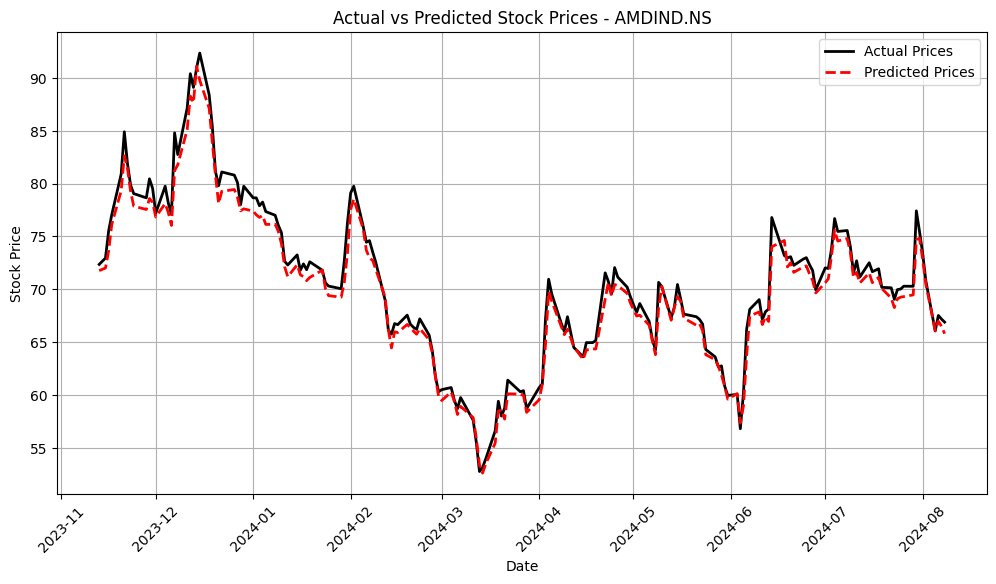

In [13]:
# Extract dates for plotting
dates_test = df["Date"].iloc[-len(y_test):]  

# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_actual, label="Actual Prices", color="black", linestyle="-", linewidth=2)
plt.plot(dates_test, y_pred, label="Predicted Prices", color="red", linestyle="dashed", linewidth=2)

# Graph Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Actual vs Predicted Stock Prices - {company}")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()